### Multiple Linear Regression

#### 1. Definition
Multiple linear regression is a statistical technique that models the relationship between one dependent variable and two or more independent variables. It extends simple linear regression by using multiple predictors to explain the variance in the dependent variable. The goal is to find the linear combination of the independent variables that best predicts the dependent variable.

#### 2. Formula for $ \hat{y}_i $
The formula for the predicted value $ \hat{y}_i $ in multiple linear regression is:

$ \hat{y}_i = \mathbf{w} \cdot \mathbf{x}_i + b $

where:
- $ \hat{y}_i $ is the predicted value of the dependent variable for the $ i $-th observation.
- $ \mathbf{w} $ is the vector of coefficients corresponding to the independent variables.
- $ \mathbf{x}_i $ is the vector of independent variables for the $ i $-th observation.
- $ b $ is the intercept term.

#### 3. Cost Function
The cost function (Mean Squared Error) for multiple linear regression, which we aim to minimize, is given by:

$$ J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2 $$

where:
- $ m $ is the number of observations.
- $ \hat{y}_i $ is the predicted value for the $ i $-th observation.
- $ y_i $ is the actual value for the $ i $-th observation.

#### 4. Gradient Descent Formulas
The gradient descent update rules for the parameters $ \mathbf{w} $ and $ b $ are given by:

$ \mathbf{w} := \mathbf{w} - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right) \mathbf{x}_i $

$ b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right) $

#### 5. Partial Derivatives
The partial derivative of the cost function with respect to $ \mathbf{w} $ is given by:

$ \frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=1}^{m} \left( (\hat{y}_i - y_i) \mathbf{x}_i \right) $

The partial derivative of the cost function with respect to $ b $ is given by:

$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) $


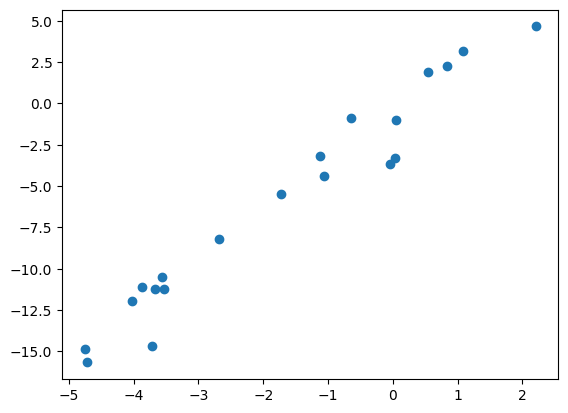

In [2]:
import numpy as np
import matplotlib.pyplot as plt
m = 20
target_w = 3.3
target_b = -1.2
X = np.random.uniform(-5,5,m)
noise = np.random.uniform(-3,3,m)
y = target_w * X + target_b + noise
plt.scatter(X,y)
plt.show()

In [33]:
X = np.array([
    [1,2],
    [2,1],
    [3,1],
    [1,3],
])
y = np.array([3,6,8,7])
X.shape,y.shape

((4, 2), (4,))

In [34]:
w = np.array([3,2])
b = -2

In [35]:
def predict_y(X,w,b):
  m = X.shape[0]
  y_hat = np.zeros(m)
  for i in range(m):
    y_hat[i] = np.dot(w,X[i]) + b
  return y_hat

In [36]:
y_hat = predict_y(X,w,b)
y_hat, y

(array([5., 6., 9., 7.]), array([3, 6, 8, 7]))

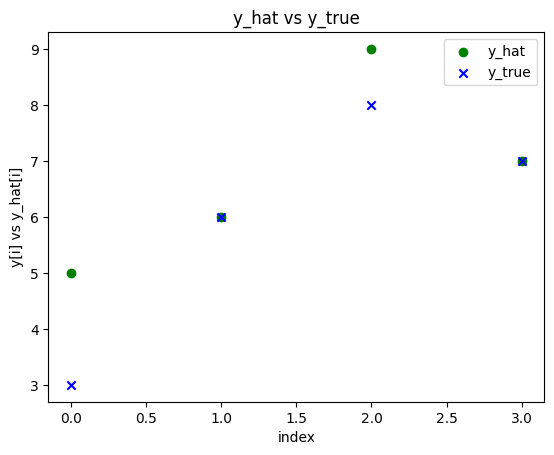

In [47]:
def plot_true_vs_preds(X,y,w,b):
  y_hat = predict_y(X,w,b)
  xaxis = np.arange(0,X.shape[0],1)
  plt.scatter(xaxis, y_hat, marker='o',color = 'g', label='y_hat')
  plt.scatter(xaxis, y, marker='x',color = 'b', label='y_true')
  plt.title('y_hat vs y_true')
  plt.xlabel('index')
  plt.ylabel('y[i] vs y_hat[i]')
  plt.legend()
  plt.show()
plot_true_vs_preds(X,y,w,b)

In [38]:
def cost_function(X,y,w,b):
  m = X.shape[0]
  y_hat = predict_y(X, w, b)
  sum = np.sum((y_hat-y)**2)
  res = sum / (2. * m)
  return res

cost_function(X,y,w,b)


0.625

In [28]:
def gradient_step(X,y,w,b):
  m = X.shape[0]
  n = X.shape[1]

  dj_dw = np.zeros(n)
  dj_db = 0

  for i in range(m):
    err = np.dot(w,X[i]) + b -y[i]
    # for j in range(n):
    #   dj_dw[j] += err*X[i,j]
    dj_dw += err *X[i]
    dj_db += err
  dj_dw /= m
  dj_db /= m

  return dj_dw, dj_db

In [39]:
alpha = 0.01

dj_dw, dj_db = gradient_step(X, y, w, b)
w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db

print(f"Cost Before: {cost_function(X, y, w, b)}")
print(f"Cost After: {cost_function(X, y, w_new, b_new)}")


Cost Before: 0.625
Cost After: 0.5894578125


In [42]:
def gradient_descent(X,y,w,b,n_iters=1000, alpha=0.01,history_interval=100):
  m = X.shape[0]
  history = {}
  for iter in range(n_iters):
    dj_dw, dj_db = gradient_step(X,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    if iter % history_interval == 0:
      cost = cost_function(X,y,w,b)
      history[iter] = cost
      print(f"Iteration\t{iter}\tCost\t{cost}")
  return history,w,b


In [43]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iteration	0	Cost	0.5894578125
Iteration	100	Cost	0.36823951957889617
Iteration	200	Cost	0.36634556681700137
Iteration	300	Cost	0.36451602962844637
Iteration	400	Cost	0.36274865552077584
Iteration	500	Cost	0.3610413323485339
Iteration	600	Cost	0.3593920197316842
Iteration	700	Cost	0.3577987466171816
Iteration	800	Cost	0.3562596089234168
Iteration	900	Cost	0.3547727672646914


In [44]:
history

{0: 0.5894578125,
 100: 0.36823951957889617,
 200: 0.36634556681700137,
 300: 0.36451602962844637,
 400: 0.36274865552077584,
 500: 0.3610413323485339,
 600: 0.3593920197316842,
 700: 0.3577987466171816,
 800: 0.3562596089234168,
 900: 0.3547727672646914}

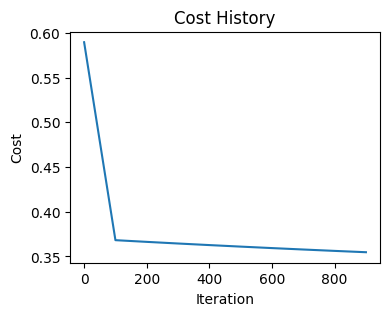

In [45]:
def plot_history(history):
    plt.figure(figsize=(4,3))
    plt.plot(history.keys(), history.values())
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
plot_history(history)

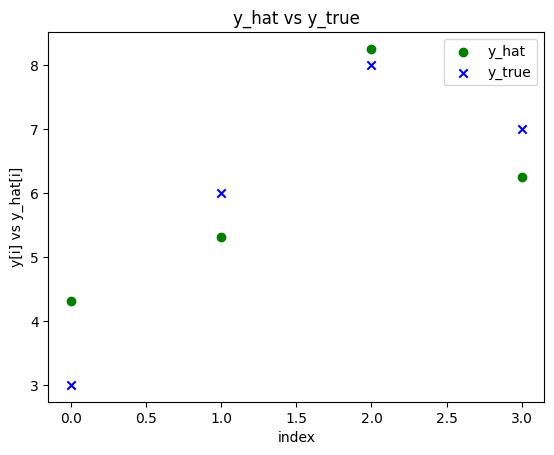

In [48]:
plot_true_vs_preds(X,y,w_new,b_new)